# RHESsys Model Simulation on Collaborative Modeling Framework

## 1) Set the project directory

In [1]:
import os

In [2]:
# Define project and watershed name
PROJNAME='RHESsys_preprocessing' 
WATERSHED='coweeta_sub18'
# Define project directory
PROJDIR = os.path.join(os.getcwd(), PROJNAME)
# Define RHESsys model iput directory
RHESSysDIR = os.path.join(PROJDIR, 'model')

## 2) Download RHESsys Execution file from HydroShare

In [3]:
from hs_restclient import HydroShare
import shutil, os, zipfile
# Download raw GIS data from HydroShare
hs = HydroShare()
resource_id = '39d9aaf4d42f4c45928c079cbe54693a'
hs.getResource(resource_id, destination=RHESSysDIR, unzip=True)
# Move to upper directory and unzip resource file
zip_resources = os.path.join(RHESSysDIR, resource_id, resource_id, 'data/contents')
zip_filename = os.listdir(zip_resources)
shutil.move(os.path.join(zip_resources, zip_filename[0]), RHESSysDIR)
zip_ref = zipfile.ZipFile(os.path.join(RHESSysDIR, zip_filename[0]), 'r')
zip_ref.extractall(RHESSysDIR)
# remove unnecessary files
shutil.rmtree(os.path.join(RHESSysDIR, resource_id))
os.remove(os.path.join(RHESSysDIR, zip_filename[0]))

## 3) Compile RHESsys Execution file

In [4]:
import subprocess, os

In [5]:
# compile RHESsys model (if returncode=0, compilation completed successfully)
delete_obj = 'cd ' + RHESSysDIR +'/RHESSys5.20.source/rhessys/objects;rm -rf *.o'
subprocess.run(delete_obj, shell=True)

CompletedProcess(args='cd /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/RHESSys5.20.source/rhessys/objects;rm -rf *.o', returncode=0)

In [6]:
complie_RHESSys = 'cd ' + RHESSysDIR +'/RHESSys5.20.source/rhessys;make'
subprocess.run(complie_RHESSys, shell=True)

CompletedProcess(args='cd /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/RHESSys5.20.source/rhessys;make', returncode=0)

## 4) Set RHESsys simulation 

In [7]:
# import RHESsys simulation module
from rhessys_simulation import execute, parameter_product, safe_arange
import numpy as np

In [8]:
# set RHESsys executable file, simulation period and path
executable = RHESSysDIR + '/RHESSys5.20.source/rhessys/rhessys5.20.0'
start_date = '2000 1 1 1'
end_date = '2000 1 10 1'
path = RHESSysDIR + '/'

## 5) Set ensemble simulations using different parameter sets

In [9]:
# set paremters ensemble
param_options = {
    's1': safe_arange(1.5, 3.5, 0.4),
    's2': safe_arange(1.0, 2.0, 0.20)
}

In [10]:
# create config for parameters ensemble
config = parameter_product(param_options)
config

{'++s1=1.5++s2=1.0++': {'parameters': {'s1': 1.5, 's2': 1.0}},
 '++s1=1.5++s2=1.2++': {'parameters': {'s1': 1.5, 's2': 1.2}},
 '++s1=1.5++s2=1.4++': {'parameters': {'s1': 1.5, 's2': 1.4}},
 '++s1=1.5++s2=1.6++': {'parameters': {'s1': 1.5, 's2': 1.6}},
 '++s1=1.5++s2=1.8++': {'parameters': {'s1': 1.5, 's2': 1.8}},
 '++s1=1.9++s2=1.0++': {'parameters': {'s1': 1.9, 's2': 1.0}},
 '++s1=1.9++s2=1.2++': {'parameters': {'s1': 1.9, 's2': 1.2}},
 '++s1=1.9++s2=1.4++': {'parameters': {'s1': 1.9, 's2': 1.4}},
 '++s1=1.9++s2=1.6++': {'parameters': {'s1': 1.9, 's2': 1.6}},
 '++s1=1.9++s2=1.8++': {'parameters': {'s1': 1.9, 's2': 1.8}},
 '++s1=2.3++s2=1.0++': {'parameters': {'s1': 2.3, 's2': 1.0}},
 '++s1=2.3++s2=1.2++': {'parameters': {'s1': 2.3, 's2': 1.2}},
 '++s1=2.3++s2=1.4++': {'parameters': {'s1': 2.3, 's2': 1.4}},
 '++s1=2.3++s2=1.6++': {'parameters': {'s1': 2.3, 's2': 1.6}},
 '++s1=2.3++s2=1.8++': {'parameters': {'s1': 2.3, 's2': 1.8}},
 '++s1=2.7++s2=1.0++': {'parameters': {'s1': 2.7, 's2':

## 6) Simulating RHESsys Model

In [13]:
# execute RHESsys Model 
sim_list = execute(executable, start_date, end_date, config, path)
sim_list

/sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/RHESSys5.20.source/rhessys/rhessys5.20.0 -st 2000 1 1 1 -ed 2000 1 10 1 -b -newcaprise -capr 0.001 -gwtoriparian -capMax 0.01 -slowDrain -leafDarkRespScalar 0.5   -frootRespScalar 0.25 -StemWoodRespScalar 0.05 -t /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/tecfiles/tec_daily.txt -w /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/worldfiles/worldfile -whdr /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/worldfiles/worldfile.hdr -r /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/flows/flowtable.txt -rtz 2.7 -pre /sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/output/++s1=1.5++s2=1.0++  -s 1.5 1.0 20.0 -sv 4.5 55.6 -gw 0.05 0.1
/sfs/qumulo/qhome/yc5ef/rhessys_preprocessing/RHESsys_preprocessing/model/RHESSys5.20.source/rhessys/rhessys5.20.0 -st 2000 1 1 1 -ed 2000 1 10 1 -b -newcapris

['++s1=1.5++s2=1.0++',
 '++s1=1.5++s2=1.2++',
 '++s1=1.5++s2=1.4++',
 '++s1=1.5++s2=1.6++',
 '++s1=1.5++s2=1.8++',
 '++s1=1.9++s2=1.0++',
 '++s1=1.9++s2=1.2++',
 '++s1=1.9++s2=1.4++',
 '++s1=1.9++s2=1.6++',
 '++s1=1.9++s2=1.8++',
 '++s1=2.3++s2=1.0++',
 '++s1=2.3++s2=1.2++',
 '++s1=2.3++s2=1.4++',
 '++s1=2.3++s2=1.6++',
 '++s1=2.3++s2=1.8++',
 '++s1=2.7++s2=1.0++',
 '++s1=2.7++s2=1.2++',
 '++s1=2.7++s2=1.4++',
 '++s1=2.7++s2=1.6++',
 '++s1=2.7++s2=1.8++',
 '++s1=3.1++s2=1.0++',
 '++s1=3.1++s2=1.2++',
 '++s1=3.1++s2=1.4++',
 '++s1=3.1++s2=1.6++',
 '++s1=3.1++s2=1.8++']

## 4. Plotting RHESsys output

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import json
import pkg_resources

In [15]:
# read output text file and create DataFrame using pandas
coweeta_sim = []
for i, values in enumerate(sim_list):
    coweeta = pd.read_csv(RHESSysDIR+'/output/'+values+'_basin.daily', delimiter=" ")
    start_date = "2000-01-01"
    end_date = "2000-01-10"
    date_index = pd.date_range(start_date, end_date, freq='1D')
    coweeta.insert(loc=0, column='Date', value=date_index[:-1].values)
    coweeta.set_index('Date')
    coweeta_sim.append(coweeta)

In [16]:
# read description and units of output variables 
METADATA_PATH = pkg_resources.resource_filename(
        __name__, 'output_variables.json')
with open(METADATA_PATH, 'r') as f:
    output_variables = json.load(f)

#### Basin Daily Output
 |                    RHESSys Output Abbreviation                   | Description |   Units |   
 |---------------------------------------------|-------------|-------------------|
 |         pot_surface_infil| Rain Throughfall    | mm          | 
 |       snow_thr        | Snow Throughfall    | mm         | 
 |sat_def_z  | Saturation Deficit with depth    | mm of depth          | 
 |sat_def | Saturation Deficit - volume  | mm of water       | 
 |rz_storage	|Rooting Zone Storage	|mm of water
 |unsat_stor|	Unsaturated Storage	|mm
 |rz_drainage|	Rooting Zone Drainage|	mm
 |unsat_drain|	Unsaturated| Storage	mm
 |cap	|Capillary Rise|	mm
 |evap	|Evaporation|	mm
 |snowpack	|Snow Water Equivalent (SWE)|	mm
 |trans	|Transpiration|	mm
 |baseflow	|Baseflow	|mm
 |return	|Return flow|	mm
 |streamflow	|Total Stream Outflow|	mm (normalized by basin area)
 | psn	|Net Photosynthesis	|kgC/m2
|lai	|Leaf Area Index	|m2/m2
|gw.Qout	|Groundwater Output	|mm
|gw.storage	|Groundwater Store	|mm
|detention_store|	Detention Store	|mm
|%sat_area|	Percent Saturated Area	|m2/m2
|litter_store|	Litter intercepted water Store	|m2/m2
|canopy_store|	Canopy Intercepted water Store	|m2/m2
|%snow_cover|	Percent Snow Cover	|m2/m2
|snow_subl|	Snow Sublimation	|
|trans_var|	Spatial variation in transpiration	|
|acc_trans		||
|acctransv_var		||
|pet	|Potential Evapotranspiration|	mm
|dC13		||
|precip	|Precipitation|	mm
|pcp_assim||		
|mortf	|Fraction of Basin that have tree mortality	|
|tmax	|Maximum Temperature	|°C
|tmin	|Minimum Temperature	|°C
|tavg	|Average Temperature	|°C
|vpd	|Vapor Pressure Deficit	|Pa
|snowfall	|Snowfall	|
|recharge	|_Recharge of water to soil	|
|gpsn	|Gross Photosynthesis	|kgC/m2
|resp	|_ Respiration_	|kgC/m2
|gs	|Canopy Conductance	|mm/s?
|rootdepth	|Rooting depth	|
|plantc	|Plant Carbon	|kgC/m2
|snowmelt	|Snow Melt	|
|canopysubl	|Canopy Sublimation	|
|routedstreamflow	||	
|canopy_snow	|Snow Intercepted on Canopy	|
|height	|Canopy height	|
|evap_can	|Canopy Evaporation?	|
|evap_lit	|Litter Evaporation_	|
|evap_soil	|Soil Evaporation_	|
|litrc	|Litter Carbon_	|
|Kdown	|Downward (from atmosphere) Direct Shortwave Radiation_	|
|Ldown	|Downward (from atmosphere) Longwave Radiation_	|
|Kup	|Reflected (upward) Shortwave Radiation_	|
|Lup	|Reflected (upward) Longwave Radiation_	|
|Kstar_can	|Absorbed shortwave by canopy	|
|Kstar_soil	|Absorbed shortwave by soil	|
|Kstar_snow	|Absorbed shortwave bysnow	|
|Lstar_can	|Absorbed longwave by canopy	|
|Lstar_soil	|Absorbed longwave by soil	|
|Lstar_snow	|Absorbed longwave by snow	|
|LE_canopy	|Latent heat evaporated by canopy	|
|LE_soil	La	||
|LE_snow		||
|Lstar_strat		||
|canopydrip		||
|ga	|Aerodynamic Conductance	|mm/s

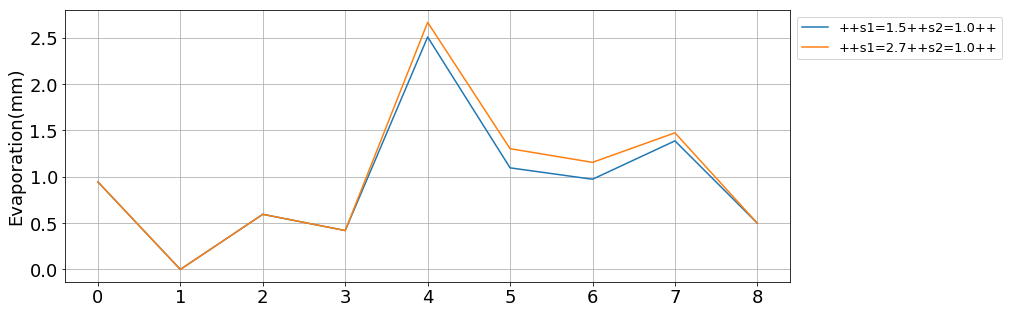

In [17]:
# set output variables and variable description
output_variable = 'evap'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
# Plotting 
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.plot(coweeta_sim[0][output_variable], label=sim_list[0])
ax.plot(coweeta_sim[15][output_variable], label=sim_list[15])
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)

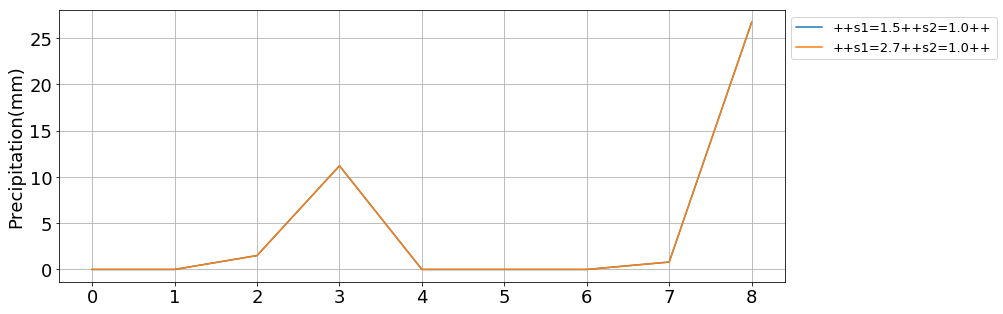

In [18]:
# set output variables and variable description
output_variable = 'precip'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
# Plotting 
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.plot(coweeta_sim[0][output_variable], label=sim_list[0])
ax.plot(coweeta_sim[15][output_variable], label=sim_list[15])
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)

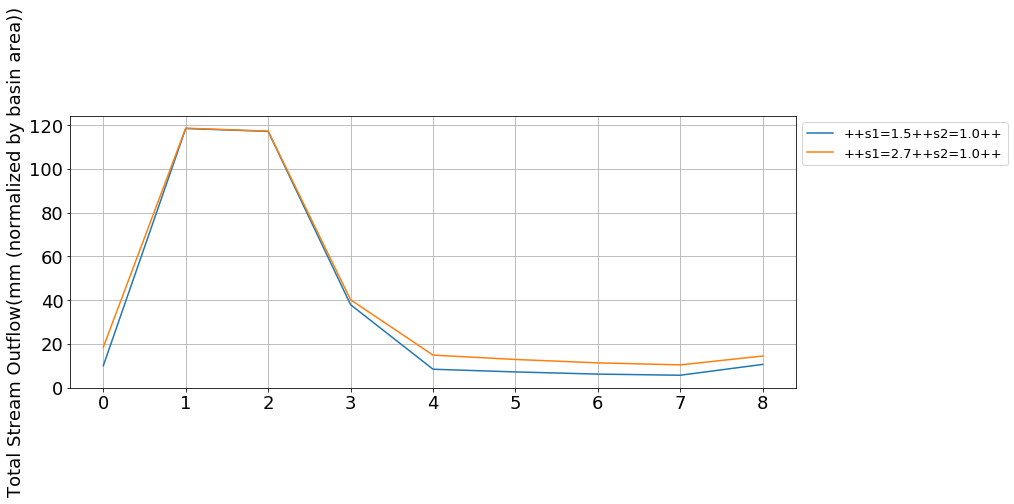

In [19]:
# set output variables and variable description
output_variable = 'streamflow'
y_axis = output_variables[output_variable]['description']+'('+output_variables[output_variable]['Units']+')'
# Plotting 
plt.figure(figsize=(13,5))
ax = plt.gca()
ax.plot(coweeta_sim[0][output_variable], label=sim_list[0])
ax.plot(coweeta_sim[15][output_variable], label=sim_list[15])
ax.grid(True)
ax.set_ylabel(y_axis, fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=13)